
```bash
conda create -n ecg-py39 python=3.9
conda activate ecg-py39
pip install neurokit2 # use pip, conda version has strange bugs
pip install biobss
conda install requests
```

Reference:
- https://github.com/obss/BIOBSS/blob/6be24b9c6ebfecf8e13d52b48c1c8d130c28ac5f/examples/ecg_processing.ipynb
- https://github.com/neuropsychology/NeuroKit?tab=readme-ov-file#electrooculography-eog
- https://neuropsychology.github.io/NeuroKit/functions/ecg.html 
TODO: read neurokit doc

In [2]:
import neurokit2 as nk
import biobss

sampling_rate = 200

# Generate 15 seconds of ECG signal
ecg = nk.ecg_simulate(duration=15, sampling_rate=sampling_rate, heart_rate=70)

ecg.shape, ecg

((3000,),
 array([ 1.09451174,  1.01181614,  0.80407502, ..., -0.09769133,
        -0.09831762, -0.09875073]))

{'ECG_R_Peaks': array([ 169,  339,  513,  686,  855, 1023, 1196, 1373, 1544, 1711, 1881,
        2055, 2228, 2397, 2567, 2739, 2911]),
 'sampling_rate': 200}

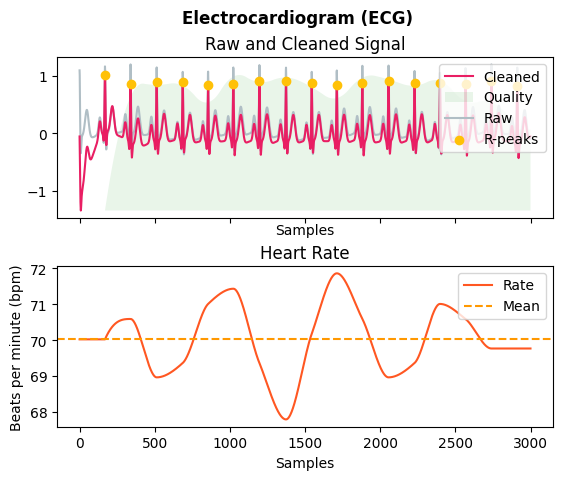

In [3]:
# Process it
signals, info = nk.ecg_process(ecg, sampling_rate=sampling_rate)

# Visualise the processing
nk.ecg_plot(signals, info)
info

In [6]:
signals

In [3]:
locs_peaks = biobss.ecgtools.ecg_detectpeaks(ecg, sampling_rate, 'pantompkins')
locs_peaks

[63,
 150,
 344,
 532,
 704,
 859,
 1032,
 1219,
 1387,
 1561,
 1725,
 1905,
 2074,
 2246,
 2421,
 2592,
 2762,
 2921]

In [4]:
# Calculate features from R peaks
# TODO: check if it's reasonable to average
features_rpeaks = biobss.ecgtools.ecg_features.from_Rpeaks(ecg, locs_peaks, sampling_rate, average=True)
features_rpeaks, list(features_rpeaks.values())

({'ecg_a_R': 0.20045983201074175,
  'ecg_RR0': 0.8430000000000001,
  'ecg_RR1': 0.8706666666666667,
  'ecg_RR2': 0.859,
  'ecg_RRm': 0.8575555555555555,
  'ecg_RR_0_1': 0.9743089353356766,
  'ecg_RR_2_1': 0.989136895301043,
  'ecg_RR_m_1': 0.9878152768789066},
 [0.20045983201074175,
  0.8430000000000001,
  0.8706666666666667,
  0.859,
  0.8575555555555555,
  0.9743089353356766,
  0.989136895301043,
  0.9878152768789066])

In [7]:
_, fiducials = nk.ecg_delineate(ecg_cleaned=ecg, rpeaks=locs_peaks, sampling_rate=sampling_rate, method='peak')
fiducials

{'ECG_P_Peaks': [nan,
  nan,
  310,
  513,
  684,
  824,
  998,
  1200,
  1368,
  1542,
  1681,
  1886,
  2054,
  2227,
  2402,
  2573,
  2743,
  2878],
 'ECG_Q_Peaks': [8,
  nan,
  336,
  521,
  693,
  851,
  1024,
  1208,
  1377,
  1551,
  1708,
  1894,
  2063,
  2236,
  2410,
  2582,
  2751,
  2905],
 'ECG_S_Peaks': [86,
  165,
  353,
  nan,
  nan,
  868,
  1041,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  2999],
 'ECG_T_Peaks': [139,
  174,
  393,
  nan,
  nan,
  909,
  1080,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'ECG_P_Onsets': [nan,
  nan,
  298,
  507,
  678,
  811,
  985,
  1194,
  1362,
  1536,
  1668,
  1880,
  2048,
  2221,
  2396,
  2567,
  2737,
  2864],
 'ECG_T_Offsets': [145,
  181,
  415,
  nan,
  nan,
  932,
  1102,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan]}

In [9]:
features_waves = biobss.ecgtools.ecg_features.from_waves(sig=ecg, R_peaks=locs_peaks, fiducials=fiducials, sampling_rate=sampling_rate, average=True)
features_waves # , list(features_waves.values())

{0: {'ecg_t_PR': nan,
  'ecg_t_QR': 0.275,
  'ecg_t_RS': 0.115,
  'ecg_t_RT': 0.38,
  'ecg_t_PQ': nan,
  'ecg_t_PS': nan,
  'ecg_t_PT': nan,
  'ecg_t_QS': 0.39,
  'ecg_t_QT': 0.655,
  'ecg_t_ST': 0.265,
  'ecg_t_PT_QS': nan,
  'ecg_t_QT_QS': 1.6794871794871795,
  'ecg_a_PQ': nan,
  'ecg_a_QR': 0.5193302217115898,
  'ecg_a_RS': -0.22860463906291692,
  'ecg_a_ST': 0.35789584291598797,
  'ecg_a_PS': nan,
  'ecg_a_PT': nan,
  'ecg_a_QS': 0.2907255826486728,
  'ecg_a_QT': 0.6486214255646607,
  'ecg_a_ST_QS': 1.2310435141460772,
  'ecg_a_RS_QR': -0.4401912877503835,
  'ecg_a_PQ_QS': nan,
  'ecg_a_PQ_QT': nan,
  'ecg_a_PQ_PS': nan,
  'ecg_a_PQ_QR': nan,
  'ecg_a_PQ_RS': nan,
  'ecg_a_RS_QS': -0.7863244678373353,
  'ecg_a_RS_QT': -0.35244694370665286,
  'ecg_a_ST_PQ': nan,
  'ecg_a_ST_QT': 0.5517792487419297},
 1: {'ecg_t_PR': nan,
  'ecg_t_QR': nan,
  'ecg_t_RS': 0.075,
  'ecg_t_RT': 0.12,
  'ecg_t_PQ': nan,
  'ecg_t_PS': nan,
  'ecg_t_PT': nan,
  'ecg_t_QS': nan,
  'ecg_t_QT': nan,
  'ecg_t_

In [21]:
import numpy as np
import math

def get_ecg_features(ecg, sampling_rate):
    locs_peaks = biobss.ecgtools.ecg_detectpeaks(ecg, sampling_rate, 'pantompkins')

    # Features from R peaks, length
    try:
        features_rpeaks = biobss.ecgtools.ecg_features.from_Rpeaks(ecg, locs_peaks, sampling_rate, average=True)
        features_rpeaks = list(features_rpeaks.values())
    except:
        features_rpeaks = [np.nan] * 8
    # Features from P, Q, R, S, T waves
    try:
        _, fiducials = nk.ecg_delineate(ecg_cleaned=ecg, rpeaks=locs_peaks, sampling_rate=sampling_rate, method='peak')
        features_waves = biobss.ecgtools.ecg_features.from_waves(sig=ecg, R_peaks=locs_peaks, fiducials=fiducials, sampling_rate=sampling_rate, average=True)
        features_waves = list(features_waves.values())
    except:
        features_waves = [np.nan] * 31
    return features_rpeaks + features_waves

In [22]:
for i in range(10):
    ecg = nk.ecg_simulate(duration=15, sampling_rate=sampling_rate, heart_rate=70)
    ecg_features = get_ecg_features(ecg, sampling_rate)
    print(len(ecg_features), sum(math.isnan(x) for x in ecg_features))

39 31
39 31
39 31
39 31
39 31
39 31
39 31
39 31
39 31
39 31


In [25]:
ecg = np.random.rand(3,100)
ecg_features = get_ecg_features(ecg, sampling_rate)
print(ecg_features.shape)
print(len(ecg_features), sum(math.isnan(x) for x in ecg_features))

AttributeError: 'list' object has no attribute 'shape'